In [1]:
import sys 
sys.path.append('../')
from dlim.model import DLIM 
from dlim.dataset import Data_model
from dlim.api import DLIM_API
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from numpy.random import choice
from src_simulate_data.sim_data import Simulated

In [2]:
# type_f = "tgaus"
type_f = "cascade" 
nb_var = 30
data_simulated = Simulated(nb_var, type_f)
data = Data_model(data=pd.DataFrame(data_simulated.data), n_variables=2)
model_save_path = None 

/home/swang/project/flux_project/dlim_v2/D-LIM-model/reproducibility/../src_simulate_data/sim_data.py:12: RuntimeWarning: invalid value encountered in power
  return ((M-m)/(1 + power(x/K, n))) + m


In [3]:

train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
val_id = [i for i in range(data.data.shape[0]) if i not in train_id]
train_data = data.subset(train_id)
val_data = data.subset(val_id)

# With spectral initialization 

In [4]:
model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
dlim_regressor = DLIM_API(model=model, flag_spectral=True)
losses = dlim_regressor.fit(train_data, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                            save_path= model_save_path)
fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 

spectral gap = 0.7868403792381287
spectral gap = 0.382099449634552


# Without spectralization 

In [5]:
model_no = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
dlim_no = DLIM_API(model=model_no, flag_spectral=False)
losses = dlim_no.fit(train_data, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                            save_path= model_save_path)
fit_no, var_no, lat_no = dlim_no.predict(val_data.data[:,:-1], detach=True) 

0.9838266099217505
0.911753944693565
PearsonRResult(statistic=0.080351116896171, pvalue=0.18807092489933805)


/home/swang/project/flux_project/dlim_v2/D-LIM-model/reproducibility/../src_simulate_data/sim_data.py:12: RuntimeWarning: invalid value encountered in power
  return ((M-m)/(1 + power(x/K, n))) + m


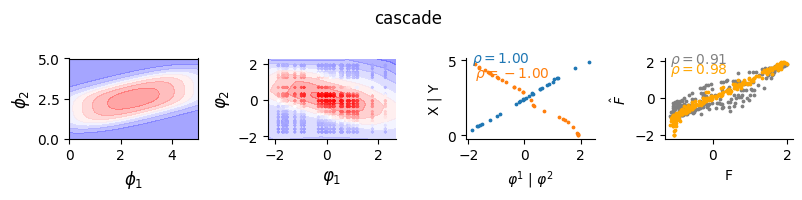

In [6]:
score = pearsonr(fit_a.flatten(), val_data.data[:, [-1]].flatten())[0]
print(score)

score_no = pearsonr(fit_no.flatten(), val_data.data[:, [-1]].flatten())[0]
print(score_no)

fig, (ax, bx, cx, dx) = plt.subplots(1, 4, figsize=(8, 2))
data_simulated.plot(ax)

dlim_regressor.plot(bx, data)

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the a00verage curve
r1 = spearmanr(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A)[0]
r2 = spearmanr(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B)[0]
print(pearsonr(lat_a[:, 0], val_data[:, -1]))
cx.text(dlim_regressor.model.genes_emb[0].detach().numpy().min(), data_simulated.A.max(), f"$\\rho={r1:.2f}$", c="C0")
cx.text(dlim_regressor.model.genes_emb[1].detach().numpy().min(), data_simulated.A.max() - 1, f"$\\rho={r2:.2f}$", c="C1")

cx.scatter(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A, c="C0", s=3)
cx.scatter(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B, c="C1", s=3)
cx.set_xlabel("$\\varphi^1$ | $\\varphi^2$")
cx.set_ylabel("X | Y")

dx.scatter(val_data.data[:, [-1]].flatten(), fit_no.flatten(), c="grey", s=3)
dx.scatter(val_data.data[:, [-1]].flatten(), fit_a.flatten(), c="orange", s=3)


dx.text(val_data.data[:, [-1]].flatten().min(), fit_no.flatten().max(), f"$\\rho={score_no:.2f}$", c="grey")
dx.text(val_data.data[:, [-1]].flatten().min(), fit_a.flatten().max() - 0.6, f"$\\rho={score:.2f}$", c="orange")

dx.set_xlabel("F")
dx.set_ylabel("$\\hat F$")
plt.suptitle(type_f)

plt.tight_layout()
plt.show()

# Title Gaussian 

spectral gap = 0.5497133731842041
spectral gap = 0.45142820477485657
0.9974509900207966
0.7126540118747804
PearsonRResult(statistic=0.01309338683824288, pvalue=0.8304243895905566)


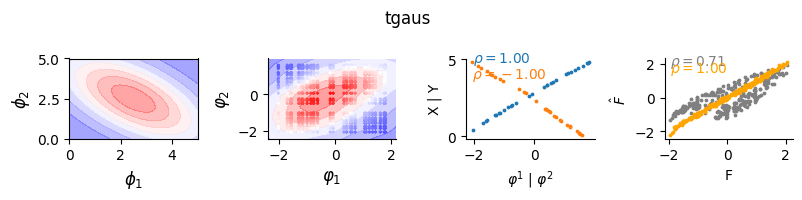

In [7]:
# type_f = "tgaus"
type_f = "tgaus" 
nb_var = 30
data_simulated = Simulated(nb_var, type_f)
data = Data_model(data=pd.DataFrame(data_simulated.data), n_variables=2)
model_save_path = None 


train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
val_id = [i for i in range(data.data.shape[0]) if i not in train_id]
train_data = data.subset(train_id)
val_data = data.subset(val_id)

model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
dlim_regressor = DLIM_API(model=model, flag_spectral=True)
losses = dlim_regressor.fit(train_data, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                            save_path= model_save_path)
fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 


model_no = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
dlim_no = DLIM_API(model=model_no, flag_spectral=False)
losses = dlim_no.fit(train_data, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                            save_path= model_save_path)
fit_no, var_no, lat_no = dlim_no.predict(val_data.data[:,:-1], detach=True) 

score = pearsonr(fit_a.flatten(), val_data.data[:, [-1]].flatten())[0]
print(score)

score_no = pearsonr(fit_no.flatten(), val_data.data[:, [-1]].flatten())[0]
print(score_no)

fig, (ax, bx, cx, dx) = plt.subplots(1, 4, figsize=(8, 2))
data_simulated.plot(ax)

dlim_regressor.plot(bx, data)

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the a00verage curve
r1 = spearmanr(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A)[0]
r2 = spearmanr(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B)[0]
print(pearsonr(lat_a[:, 0], val_data[:, -1]))
cx.text(dlim_regressor.model.genes_emb[0].detach().numpy().min(), data_simulated.A.max(), f"$\\rho={r1:.2f}$", c="C0")
cx.text(dlim_regressor.model.genes_emb[1].detach().numpy().min(), data_simulated.A.max() - 1, f"$\\rho={r2:.2f}$", c="C1")

cx.scatter(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A, c="C0", s=3)
cx.scatter(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B, c="C1", s=3)
cx.set_xlabel("$\\varphi^1$ | $\\varphi^2$")
cx.set_ylabel("X | Y")

dx.scatter(val_data.data[:, [-1]].flatten(), fit_no.flatten(), c="grey", s=3)
dx.scatter(val_data.data[:, [-1]].flatten(), fit_a.flatten(), c="orange", s=3)


dx.text(val_data.data[:, [-1]].flatten().min(), fit_no.flatten().max(), f"$\\rho={score_no:.2f}$", c="grey")
dx.text(val_data.data[:, [-1]].flatten().min(), fit_a.flatten().max() - 0.6, f"$\\rho={score:.2f}$", c="orange")

dx.set_xlabel("F")
dx.set_ylabel("$\\hat F$")
plt.suptitle(type_f)

plt.tight_layout()
plt.show()

# Biomechanistic model 

spectral gap = 0.9475138187408447
spectral gap = 0.9285898208618164
0.9972483491464637
0.9901628195183296
PearsonRResult(statistic=-0.638380100286692, pvalue=2.614907064804665e-32)


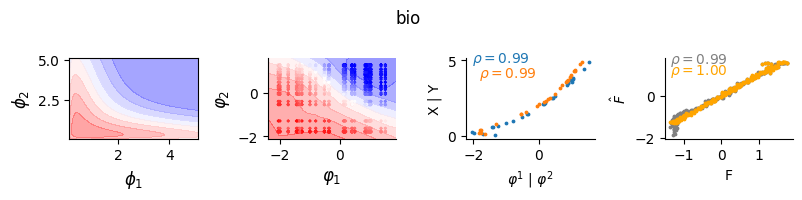

In [8]:
type_f = "bio" 
nb_var = 30
data_simulated = Simulated(nb_var, type_f)
data = Data_model(data=pd.DataFrame(data_simulated.data), n_variables=2)
model_save_path = None 


train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
val_id = [i for i in range(data.data.shape[0]) if i not in train_id]
train_data = data.subset(train_id)
val_data = data.subset(val_id)

model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
dlim_regressor = DLIM_API(model=model, flag_spectral=True)
losses = dlim_regressor.fit(train_data, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                            save_path= model_save_path)
fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 


model_no = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
dlim_no = DLIM_API(model=model_no, flag_spectral=False)
losses = dlim_no.fit(train_data, lr = 1e-3, nb_epoch=300, batch_size=32, emb_regularization=0, \
                            save_path= model_save_path)
fit_no, var_no, lat_no = dlim_no.predict(val_data.data[:,:-1], detach=True) 

score = pearsonr(fit_a.flatten(), val_data.data[:, [-1]].flatten())[0]
print(score)

score_no = pearsonr(fit_no.flatten(), val_data.data[:, [-1]].flatten())[0]
print(score_no)

fig, (ax, bx, cx, dx) = plt.subplots(1, 4, figsize=(8, 2))
data_simulated.plot(ax)

dlim_regressor.plot(bx, data)

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the a00verage curve
r1 = spearmanr(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A)[0]
r2 = spearmanr(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B)[0]
print(pearsonr(lat_a[:, 0], val_data[:, -1]))
cx.text(dlim_regressor.model.genes_emb[0].detach().numpy().min(), data_simulated.A.max(), f"$\\rho={r1:.2f}$", c="C0")
cx.text(dlim_regressor.model.genes_emb[1].detach().numpy().min(), data_simulated.A.max() - 1, f"$\\rho={r2:.2f}$", c="C1")

cx.scatter(dlim_regressor.model.genes_emb[0].detach(), data_simulated.A, c="C0", s=3)
cx.scatter(dlim_regressor.model.genes_emb[1].detach(), data_simulated.B, c="C1", s=3)
cx.set_xlabel("$\\varphi^1$ | $\\varphi^2$")
cx.set_ylabel("X | Y")

dx.scatter(val_data.data[:, [-1]].flatten(), fit_no.flatten(), c="grey", s=3)
dx.scatter(val_data.data[:, [-1]].flatten(), fit_a.flatten(), c="orange", s=3)


dx.text(val_data.data[:, [-1]].flatten().min(), fit_no.flatten().max(), f"$\\rho={score_no:.2f}$", c="grey")
dx.text(val_data.data[:, [-1]].flatten().min(), fit_a.flatten().max() - 0.6, f"$\\rho={score:.2f}$", c="orange")

dx.set_xlabel("F")
dx.set_ylabel("$\\hat F$")
plt.suptitle(type_f)

plt.tight_layout()
plt.show()